In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(12,6)})
df = pd.read_csv('log.csv',names=['Game','ExplrRt','Score','Moves'])
a = df.loc[df['ExplrRt'] == 1,'Score']
b = df.loc[df['ExplrRt'] < 1,'Score']
df_stats = pd.DataFrame()
f = open('log.log','r')
for aline in f.readlines():
    values = {}
    for kv in aline.replace(' ','').split(','):
        values[kv.split(':')[0]] = [float(kv.split(':')[1])]
    df_stats = df_stats.append(pd.DataFrame(values),ignore_index=True)
f.close()

In [3]:
def plot(order=1, column='Score'):
    if df.shape[0] < (order + 2):
        print('Need more observations before plotting')
        return

    ax = sns.lineplot(x='Game',y=column,data=df)
    ax.axvline(df.loc[df['ExplrRt'] < 1,'Game'].min(), color="red", linestyle="--")
    sns.regplot(x='Game',y=column,data=df,order=order)
    plt.show()
    
def plot_loss():
    ax = sns.lineplot(x=range(df_stats.shape[0]),y='loss',data=df_stats)
    sns.regplot(range(df_stats.shape[0]),y='loss',lowess=True,data=df_stats)
    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.show()
    
def plot_accr():
    ax = sns.lineplot(x=range(df_stats.shape[0]),y='accuracy',data=df_stats)
    sns.regplot(range(df_stats.shape[0]),y='accuracy',lowess=True,data=df_stats)
    plt.xlabel('iteration')
    plt.ylabel('accuracy')
    plt.show()  
        
def dist():
    sns.distplot(a, color='red', label='Random Games')
    sns.distplot(b, color='skyblue', label='AI Games')
    plt.legend()
    plt.show()
    
def ttest():
    print('random score mean: {}'.format(a.mean()))
    print('ai train mean: {}'.format(b.mean()))
    print(ttest_ind(a=a,b=b))

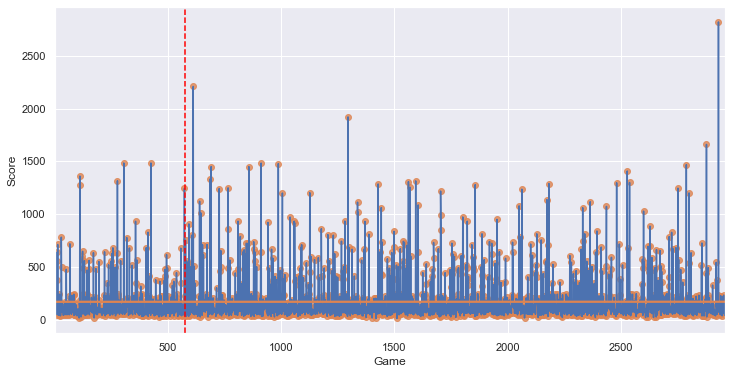

In [4]:
plot()

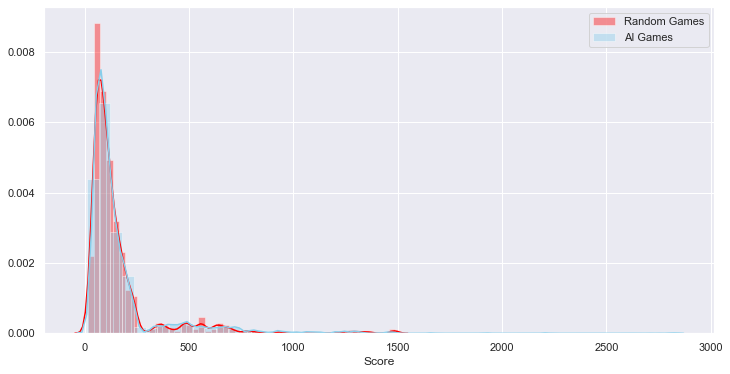

In [5]:
dist()

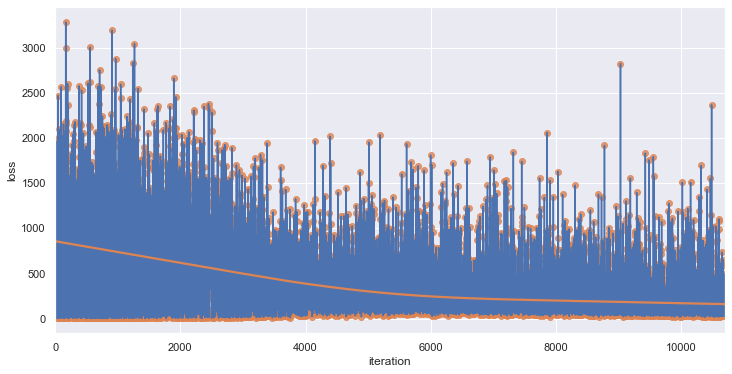

In [6]:
plot_loss()

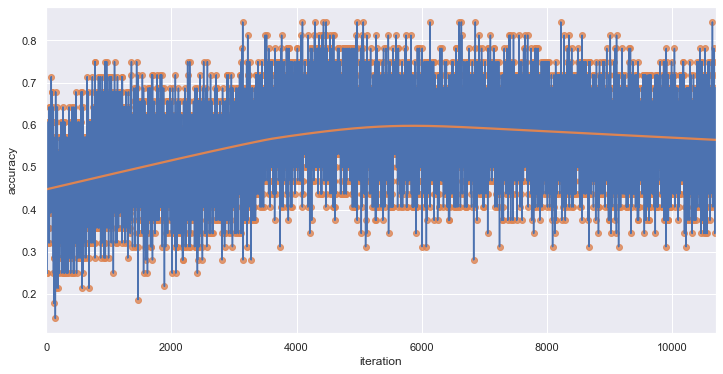

In [7]:
plot_accr()

In [8]:
ttest()

random score mean: 155.53658536585365
ai train mean: 171.48031825795644
Ttest_indResult(statistic=-1.601727485312877, pvalue=0.10932258928867036)
